# CPTR 435 Machine Learning 
# Gabriel Becton
# 12/16/21

## Final Project

### **Background Knowledge**

In this project we will be reviewing over the topic of a specific video game. The video game of choice is named League of Legends(LoL). League of Legends is an MOBA(Multiyplayer Online Battle Arena) that consist of 10 online players that are split into two, 5 man teams. The objective of the game is to destroy the other teams Nexus, which is as the end of their base. There is a red team and blue team, both teams will always start in their base and will have to strategize to destroy the enemy nexus. Strategy is very important in LoL because there are a lot of vairables that contribute to making your team stronger so that you can defeat your enemies. There are three lanes that split the map. Everything that is outside of these lanes is called the "Jungle". In the lanes there are Turrets that protect the base and minions that will spawn throughout the game. Destroying these will give you gold(gold is also given as time passes, but at a much slower rate). 

Furthermore, some information on the data itself. There are several columns that are already changed from categorical. The original dataset had columns that have 0(no) and 1(yes) instead of the categorical phrase "yes" and  "no". The column is described in detail on the original posting in Kaggle. https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

### **Project Explination**

So, what are the features/attributes that will most determine the victor? Well my own prediction would say that it is which team that has the most kills. Since, when you die you have to wait to respawn. Therefore, giving the other team more time to get gold and destroy towers. However, that is what this projcet is designed to see so lets dive in to better understand the problem.

### **1) Understand the Problem** 

### Inputs and Outputs?

The input to the problem will be the features(columns) that are in the dataset. The output of the problem will be how well or poor these features coorelate to the outcome of winning the game(blueWins).

### What Type of Problem is this? 

All of the data in the dataset is numerical. Therefore, the inputs and output of the problem will all be numeric. Hence, the problem is a regression problem.

### What Features or Attributes will be in the Dataset

gameId, blueWins, blueWardsPlaced, blueWardsDestroyed, blueFirstBlood, blueKills, blueDeaths, blueAssists, blueEliteMonsters, blueDragons, blueHeralds,  blueTowersDestroyed, blueTotalGold,  blueGoldDiff, blueExperienceDiff,blueGoldPerMin. 

All other features will be removed from the data so that it will not overfit.

### What is my evaluation metric?

I will be using accuray and RSME(Root Square Mean Error) for my evaluation metric.

### **2) Get the Data**

In [1]:
# Import all the packages that I will need/use.

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
# read the dataset into a DataFrame. 
# You will need to upload the file first before reading the dataset.

df = pd.read_csv('high_diamond_ranked_10min.csv')

### **3) Explore the Data**

In [5]:
# Lets take a look at the first few rows of the DataFrame
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
# Look at the statistical data
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [7]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [8]:
len(df)

9879

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [10]:
df.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


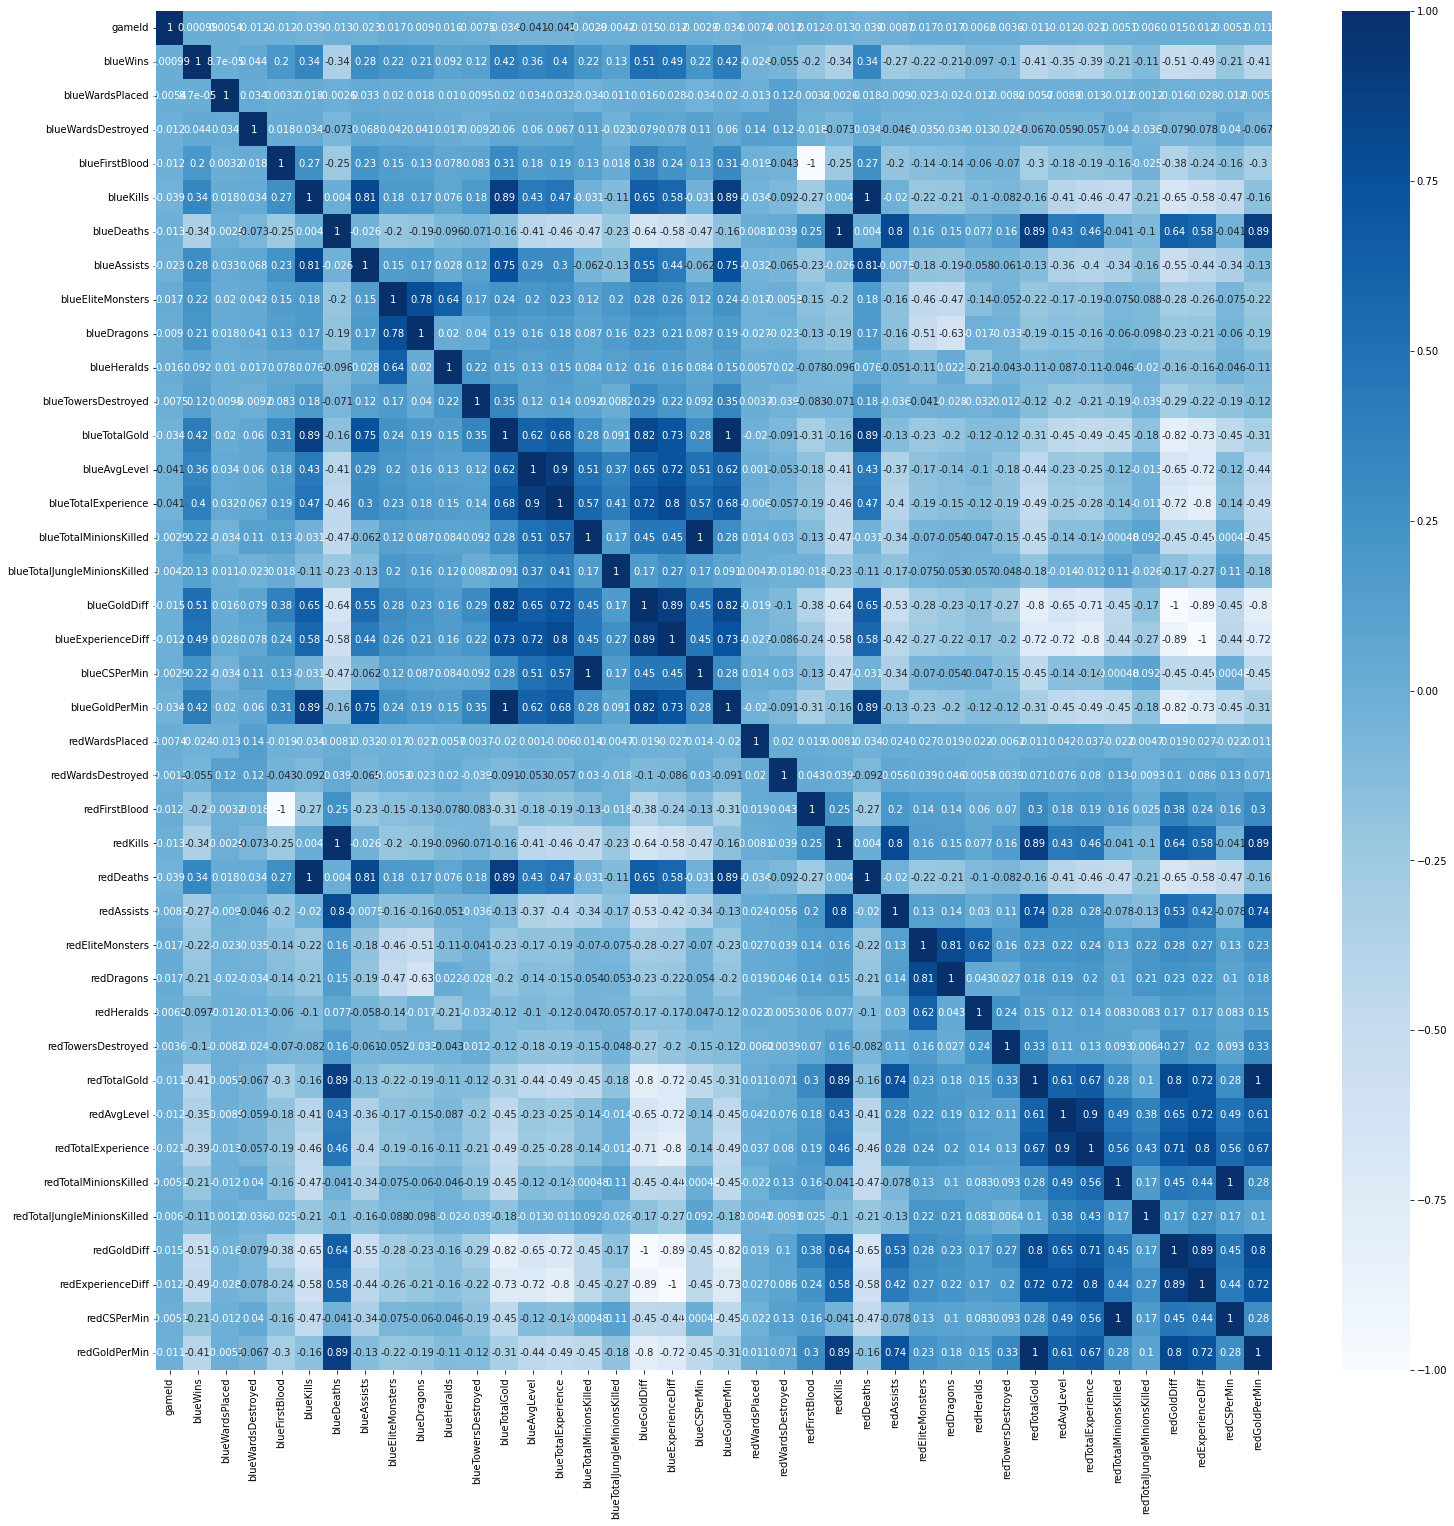

In [11]:
# lets take a better look at the coorelation by using seaborn to create a visual figure

plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot = True, cmap = plt.cm.Blues)
plt.show()

From the coorelation matrix. We can see that all of the blue teams columns will more then likely correlate with the red teams columns. This is pretty obvious because if blue team wins then obviously the red team would lose and vice versa. There are others columns that seem to be useless in the dataset and will only cause overfitting. Therefore, we should drop some of these columns. Personally, I am choosing to drop all of the read team columns. In addtion to several blue columns.

In [12]:
df.drop(['gameId','blueWardsDestroyed', 'blueCSPerMin','blueAvgLevel','redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists','blueWardsPlaced','blueWardsDestroyed',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'], axis = 1, inplace = True)


Now let us take a look at the coorelations

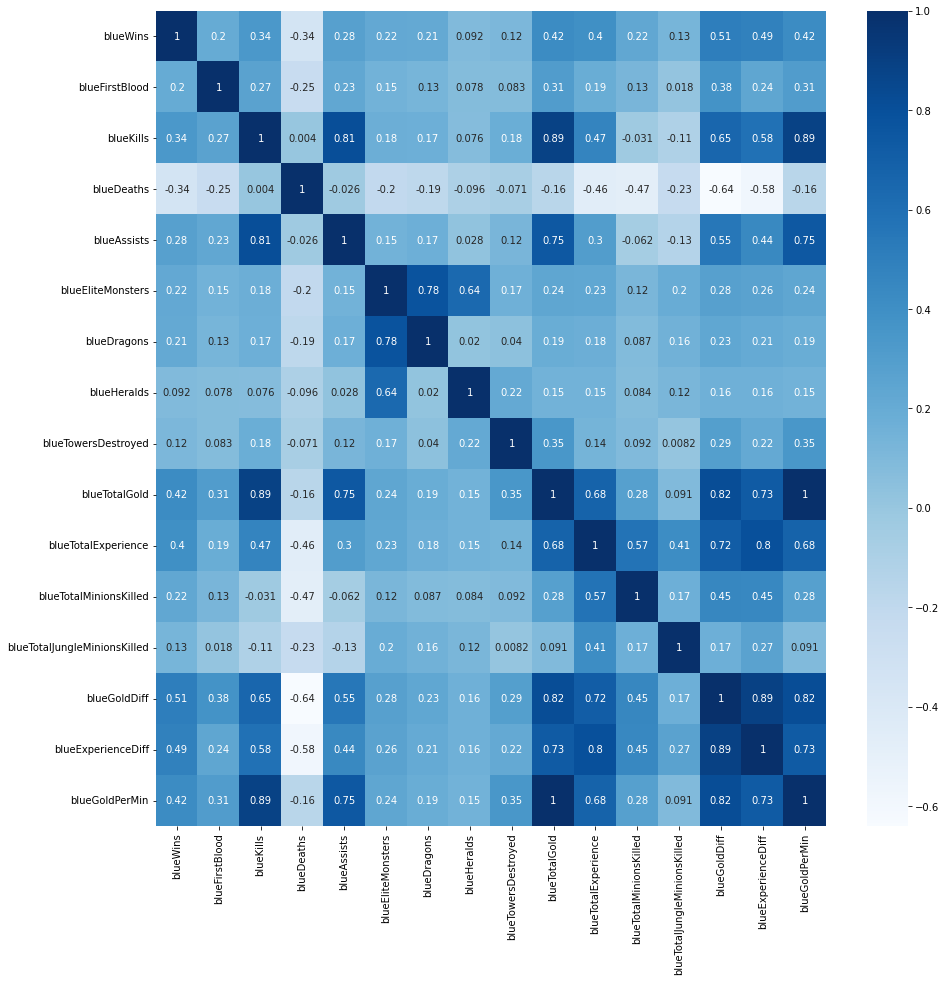

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True, cmap = plt.cm.Blues)
plt.show()

Since we want to know what features will affect the winner. Lets show the correlations directly to the blue team winning.

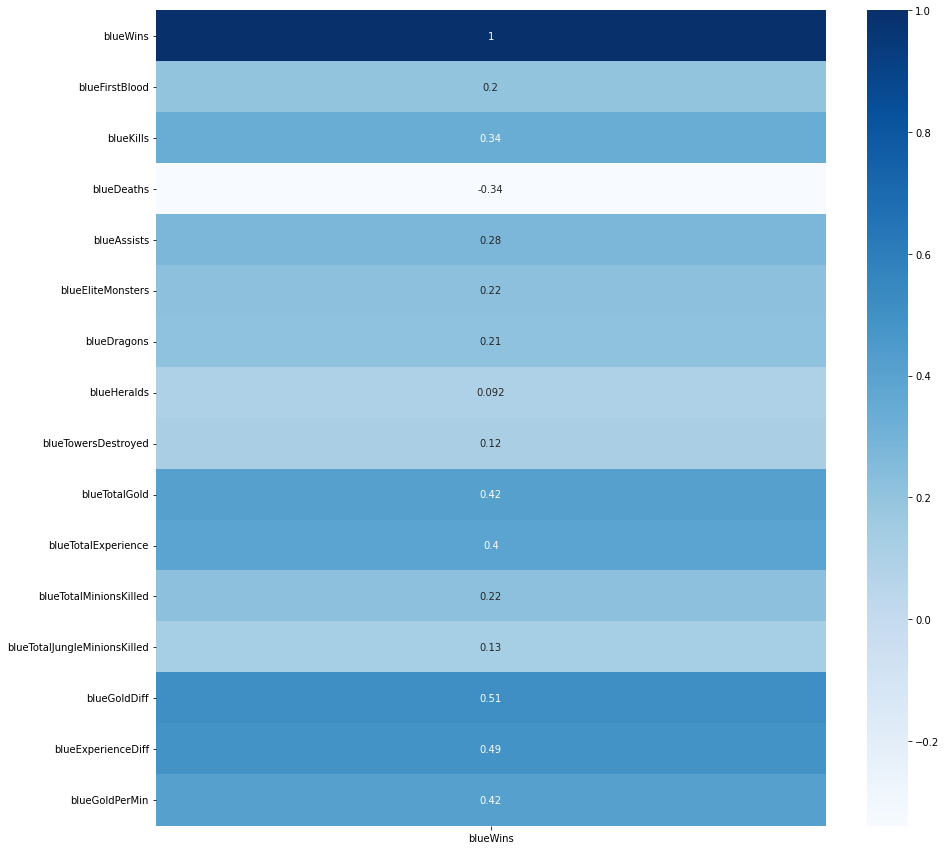

In [14]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr()[['blueWins']],annot = True, cmap = plt.cm.Blues)

Finally lets take a look at all the Features that are in the dataframe

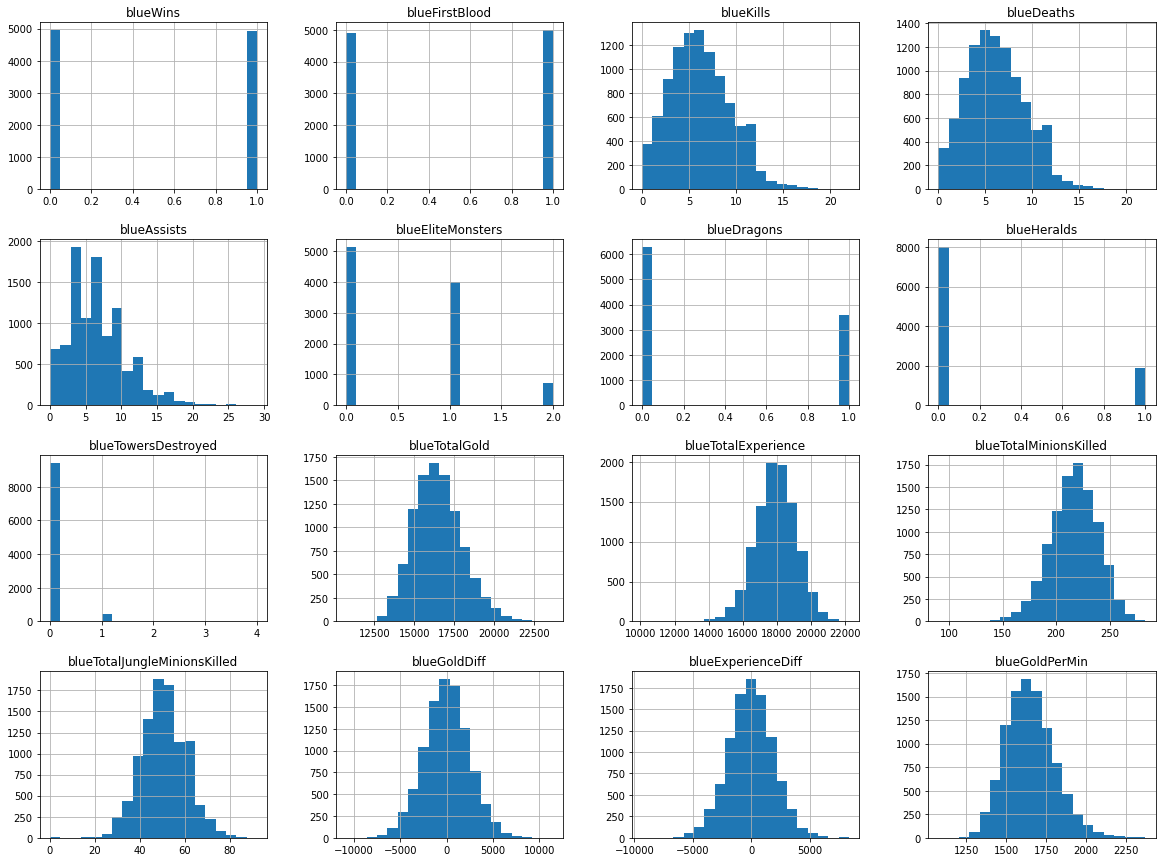

In [15]:
df.hist(bins=20, figsize=(20,15)) # calls matplotlib.pyplot.hist to plot histograms

plt.show()

There are several things we can see from the data that is shown. One of those things is that the highest correlation to winning is the gold difference. So if the blue team has a higher gold amount then that correlates to if they're going to win or not. This can also be shown in the blueTotalGold. Destroying towers, killing the herald monster, and jungle kills seem to have little correlation to winning a game. In additon, we can see that most games are not too far apart in terms of gold and experience. We can see this in the histogram charts under blueExperienceDiff and blueGoldDiff. This is to be expected because the data is only showing the first 10 minutes of the game. Where as some games can last for a whole hour. 

# **4) Prepare the Data**

In [16]:
# Check for any null values in dataframe
df.isnull().sum()

blueWins                        0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueGoldPerMin                  0
dtype: int64

Since there are zero null values in the data, we wont have to replace them or drop any columns/index. Hence, we can get right into preparing the data to be trained.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#These are the features that have values greater than 1. They do not represent a categorical feature.
X_num = df[['blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueTowersDestroyed', 'blueTotalGold', 'blueTotalExperience',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'blueGoldDiff', 'blueExperienceDiff', 'blueGoldPerMin']]


#These are numeric(0,1) however, the 0 = No and the 1=Yes. So i seperated them from the num
X_category = df[['blueDragons','blueHeralds','blueFirstBlood']] 

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled,index=X_num.index,columns=X_num.columns)

X = pd.concat([X_scaled,X_category],axis = 1) #Creating the input features that will be used in training
y = df['blueWins'] # Creating the output that we want to evaluate for training and testing

# making training/validation/test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [18]:
# Check to see how large my training/valid/test sets are
print(X_train_full.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(7409, 15)
(2470, 15)
(1853, 15)
(1853,)


# **5) Select, Train and Evaluate Model**

### **A) Choosing  Logistic Regression and Random Forest as my non-neural net training**

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42, n_estimators=10)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

### **B) Tuning HyperParameters**



In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [22]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_valid, y_valid)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [23]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [24]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [25]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4891182914288607 {'max_features': 2, 'n_estimators': 3}
0.44837573028933403 {'max_features': 2, 'n_estimators': 10}
0.4340367110887882 {'max_features': 2, 'n_estimators': 30}
0.4877104400493919 {'max_features': 4, 'n_estimators': 3}
0.4474002512007922 {'max_features': 4, 'n_estimators': 10}
0.43264294320426006 {'max_features': 4, 'n_estimators': 30}
0.4886339976596431 {'max_features': 6, 'n_estimators': 3}
0.44693143645852296 {'max_features': 6, 'n_estimators': 10}
0.43305206869615426 {'max_features': 6, 'n_estimators': 30}
0.4877642101532026 {'max_features': 8, 'n_estimators': 3}
0.44040414362046354 {'max_features': 8, 'n_estimators': 10}
0.43406443752643853 {'max_features': 8, 'n_estimators': 30}
0.4995002480503735 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.45260522507445416 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4904752356565741 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.44904259387161616 {'bootstrap': False, 'max_features

In [26]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011659,0.002301,0.003329,0.000736,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.250674,-0.232105,...,-0.239237,0.015754,15,-0.056380,-0.060204,-0.058704,-0.057841,-0.059864,-0.058599,0.001392
1,0.030467,0.002628,0.004232,0.000365,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.213585,-0.191617,...,-0.201041,0.015173,8,-0.033630,-0.035823,-0.034062,-0.034134,-0.034895,-0.034509,0.000773
2,0.073803,0.002258,0.007471,0.000850,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.197335,-0.185274,...,-0.188388,0.013568,3,-0.027886,-0.028270,-0.025691,-0.027456,-0.027988,-0.027458,0.000921
3,0.012594,0.000445,0.002907,0.000059,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.241989,-0.224319,...,-0.237861,0.019543,12,-0.053456,-0.058629,-0.061179,-0.057466,-0.062486,-0.058643,0.003146
4,0.035748,0.002765,0.003943,0.000096,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.204582,-0.184609,...,-0.200167,0.013679,7,-0.033509,-0.035121,-0.034345,-0.035597,-0.034922,-0.034699,0.000718
5,0.113536,0.015513,0.011883,0.009354,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.193360,-0.182135,...,-0.187180,0.010423,1,-0.027737,-0.027753,-0.027416,-0.028142,-0.027784,-0.027766,0.000230
6,0.064827,0.021822,0.007444,0.004172,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.261755,-0.224019,...,-0.238763,0.013735,14,-0.053756,-0.059229,-0.056680,-0.058890,-0.061737,-0.058058,0.002683
7,0.067814,0.035989,0.005906,0.002793,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.213827,-0.186119,...,-0.199748,0.013028,6,-0.033617,-0.035324,-0.034325,-0.035239,-0.035651,-0.034831,0.000750
8,0.126644,0.004556,0.006666,0.000043,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.193890,-0.182168,...,-0.187534,0.011115,2,-0.027545,-0.028491,-0.028042,-0.028118,-0.028115,-0.028062,0.000302
9,0.018628,0.002686,0.002994,0.000057,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.255466,-0.229111,...,-0.237914,0.018473,13,-0.051432,-0.058480,-0.054281,-0.059564,-0.057616,-0.056274,0.002997


### **C) Create the Model for Neural Nets**

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(15, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid') 
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 30)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


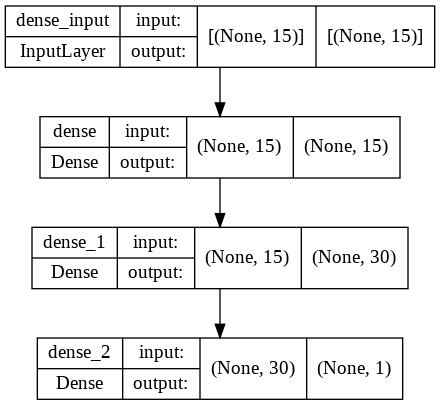

In [29]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [30]:
hidden1 = model.layers[1]

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[-0.25655776, -0.32256526, -0.21437983,  0.03528371, -0.13890617,
         0.33981442,  0.149652  , -0.13445252,  0.22698718,  0.02884689,
        -0.07896611,  0.14601463, -0.21529873,  0.16194177,  0.06060588,
        -0.1931473 ,  0.03436559, -0.16116954, -0.28357697, -0.17364758,
         0.33899838, -0.30118054,  0.05226538,  0.06838384, -0.15330714,
         0.0870041 ,  0.1590752 ,  0.06482238, -0.12145291, -0.31909886],
       [ 0.13653088, -0.0123015 , -0.14434426, -0.15504204, -0.26157153,
        -0.15803424, -0.10015476,  0.3086244 ,  0.06068075,  0.2872066 ,
        -0.14010252, -0.18552259,  0.33048683,  0.02208483,  0.13721442,
         0.06494564,  0.04691485,  0.19513518, -0.35212988, -0.07859942,
        -0.26015702,  0.09175232,  0.00356433,  0.358728  ,  0.223189  ,
         0.09304106,  0.21593696,  0.23668623, -0.29767907,  0.18257374],
       [ 0.3212669 , -0.25861922, -0.31180435,  0.3326478 ,  0.2536407 ,
        -0.2877426 , -0.15584245,  0.04404271,  0

In [33]:
biases.shape

(30,)

### **D) Use the Neural Nets on Validation Set**

In [34]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **E) Train Baseline and Neural Nets on Training Set**

In [35]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [36]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [37]:
history = model.fit(X_train, y_train, 
                    epochs=15, 
                    validation_data=(X_valid, y_valid))

Epoch 1/15
174/174 [==============================] - 2s 3ms/step - loss: 0.5702 - accuracy: 0.6978 - val_loss: 0.5249 - val_accuracy: 0.7291
Epoch 2/15
174/174 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7176 - val_loss: 0.5207 - val_accuracy: 0.7356
Epoch 3/15
174/174 [==============================] - 1s 3ms/step - loss: 0.5419 - accuracy: 0.7232 - val_loss: 0.5179 - val_accuracy: 0.7339
Epoch 4/15
174/174 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.7239 - val_loss: 0.5167 - val_accuracy: 0.7388
Epoch 5/15
174/174 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7279 - val_loss: 0.5156 - val_accuracy: 0.7415
Epoch 6/15
174/174 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7252 - val_loss: 0.5178 - val_accuracy: 0.7404
Epoch 7/15
174/174 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.7266 - val_loss: 0.5181 - val_accuracy: 0.7404
Epoch 

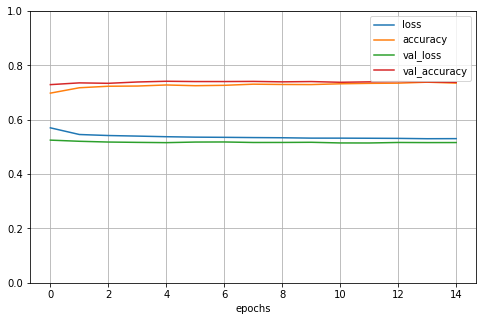

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('epochs')

plt.show()

### **F) Evaluate Models on Test Set**

In [39]:
log_reg_predictions = log_reg.predict(X_test)
log_reg_mse = mean_squared_error(y_test, log_reg_predictions)
log_reg_rmse = np.sqrt(log_reg_mse)
print(log_reg_rmse)

0.5215982911474454


In [40]:
forest_reg_predictions = forest_reg.predict(X_test)
forest_reg_mse = mean_squared_error(y_test, forest_reg_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)
print(forest_reg_rmse)

0.45432247014933247


In [41]:
model.evaluate(X_test, y_test)

78/78 [==============================] - 0s 1ms/step - loss: 0.5320 - accuracy: 0.7194


[0.5319762229919434, 0.7194331884384155]

### **G) Final Remarks**

Some final remarks that I can say is that the accuracy was a lot lower than I would have liked. I think I could have used better training and test sets so that the accuracy would work a lot better. For example I could have made more or less neural layers in my neural net. Also, if I did more research on what sets work bet for my specific data then that could have helped my project too. I found out that the best feature in the data for blueWins was the total Gold aquired. This is something that I predicted before doing the experiment based off of background knowledge from playing the game myself. 

# **6) Future Work**

After completing there are some ideas that I have for future work. For future work, I would prefer to have data that I have collected so that I can choose my feature by hand. This way I can make predictions based on my own background knowledge of the topic. Secondly, I test out a handful of differnt testing types. For example, I could have tried many different layers in my neural nets. I could have tried a differnt approch on my neural network or maybe organized my data in a differernt way. Lastly, I hope to know more about python in machine learning so that I can have more affective coding in my experiments. 